In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
train_data = pd.read_excel(r"C:\Users\Rishika Gitta\Downloads\Data_Train.xlsx")

In [224]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [225]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [226]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [227]:
train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [228]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [229]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [230]:
train_data.dropna(inplace=True)

In [231]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [232]:
train_data.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [233]:
train_data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [234]:
data = train_data.copy()

In [235]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [236]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [237]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [238]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [239]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [240]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)
    

In [241]:
data.dtypes


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [242]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [243]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [244]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-05 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-05 05:50:00,2025-11-05 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-05 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6


In [245]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [246]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month'],
      dtype='object')

In [247]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-05 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-05 05:50:00,2025-11-05 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-05 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25


In [248]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-05 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-05 05:50:00,2025-11-05 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-05 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25


In [249]:
cols_to_drop = ['Dep_Time', 'Arrival_Time']

data.drop(cols_to_drop, axis = 1, inplace = True)

In [250]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [251]:
data.shape

(10682, 15)

In [252]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

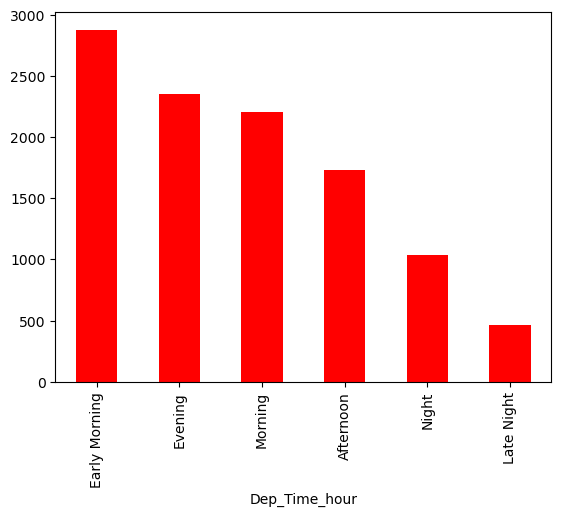

In [253]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar", color='r')

In [256]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [257]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late Night        465
Name: count, dtype: int64

In [259]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [260]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [261]:
data['Duration']= data['Duration'].apply(preprocess_duration)


In [262]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [263]:
data['Duration'][0]

'2h 50m'

In [264]:
'2h 50m'.split(' ')[0]


'2h'

In [265]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [266]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [267]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [268]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [269]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [270]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [271]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [272]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [273]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [274]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [275]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

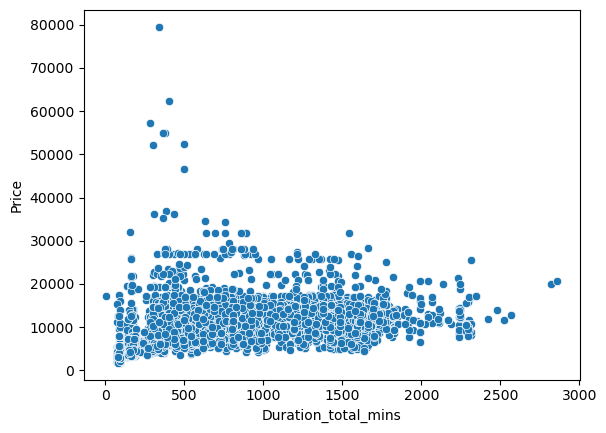

In [276]:
sns.scatterplot(x = 'Duration_total_mins', y = 'Price', data = data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

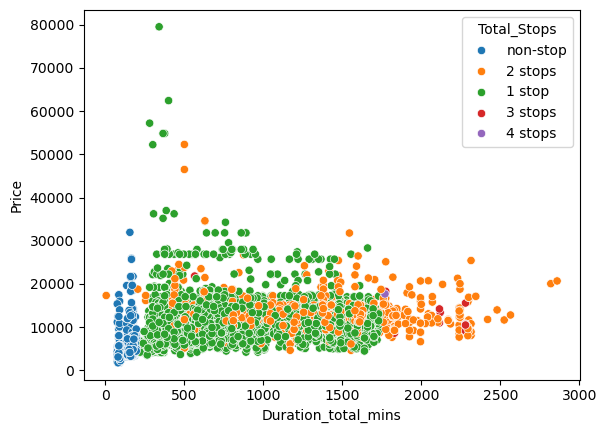

In [277]:
sns.scatterplot(x = 'Duration_total_mins', y = 'Price', hue = 'Total_Stops', data = data)

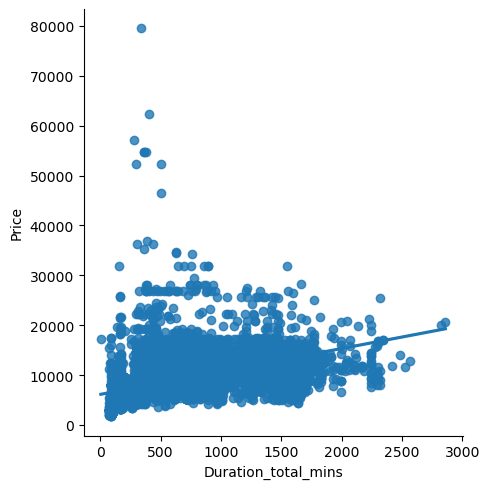

In [278]:
sns.lmplot(x = 'Duration_total_mins', y = 'Price', data = data)

In [279]:
data[data['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,13,25,4,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,20,35,21,20,24,45,1485


In [280]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

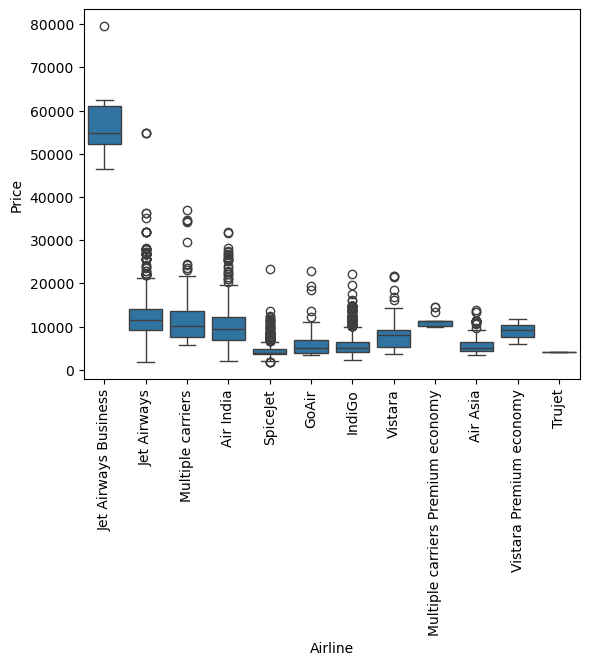

In [281]:
sns.boxplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation = 'vertical')
plt.show()

In [282]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [283]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [284]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [285]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [286]:
for sub in data['Source'].unique():
    data['Source_' + sub] = data['Source'].apply(lambda x : 1 if x == sub else 0)

In [287]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [288]:
data.drop(['Source_Banglore', 'Source_Kolkata'], axis=1, inplace=True)

In [289]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,1,10,2,50,170,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,13,15,7,25,445,0,0,0


In [290]:
data.drop(['Source_Delhi', 'Source_Mumbai', 'Source_Chennai'], axis=1, inplace=True)

In [291]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445


In [292]:
data['Airline'].nunique()

12

In [293]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [294]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [295]:
dict_airlines = {key:index for index, key in enumerate(airlines,0)}

In [296]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [297]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [298]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445


In [299]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [300]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [301]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [302]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [303]:
dict_dest = {key:index for index, key in enumerate(dest,0)}

In [304]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [305]:
data['Destination'] = data['Destination'].map(dict_dest)

In [306]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [307]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0,1140


In [308]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0,1140


In [309]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [310]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [311]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [312]:
data['Total_Stops']= data['Total_Stops'].map(stop)

In [313]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [314]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,170


In [315]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [316]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,170
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25,445
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,6,9,25,4,25,19,0,1140
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30,5,25,325


In [317]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [318]:
data.drop(columns = ['Date_of_Journey', 'Additional_Info','Duration_total_mins', 'Source'], axis=1, inplace = True)

In [319]:
data.head(3)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0


In [320]:
data.drop(columns = ['Route'], axis=1, inplace = True)

In [321]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25


In [322]:
data.drop(columns = ['Duration'], axis=1, inplace = True)

In [323]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3,2,0,3897,24,3,22,20,1,10,2,50
1,7,3,2,7662,1,5,5,50,13,15,7,25


In [324]:
def plot(df, col):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3, kde = False)

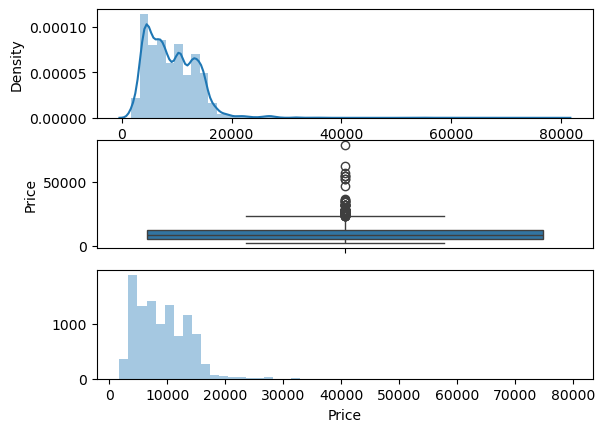

In [325]:
plot (data, 'Price')

In [326]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [327]:
print(maximum)

23017.0


In [328]:
print(minimum)

-5367.0


In [329]:
print([price for price in data['Price'] if price<minimum or price>maximum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [330]:
len([price for price in data['Price'] if price<minimum or price>maximum])

94

In [331]:
data['Price']= np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

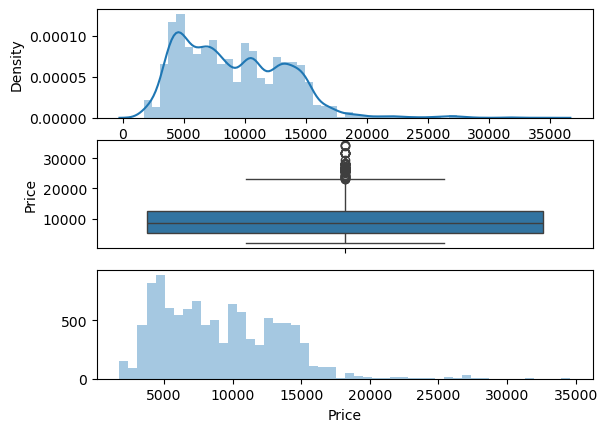

In [332]:
plot(data, 'Price')

In [333]:
y = data['Price']

In [334]:
X = data.drop(['Price'], axis=1)

In [335]:
from sklearn.feature_selection import mutual_info_regression

In [336]:
imp = mutual_info_regression(X,y)

In [338]:
imp

array([1.31340542, 1.06616409, 0.78733566, 0.36902909, 0.61697506,
       0.92408309, 0.75023488, 1.13977845, 0.88649593, 1.12107978,
       0.66453058])

In [339]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [340]:
imp_df

,0
Airline,1.313405
Destination,1.066164
Total_Stops,0.787336
Journey_day,0.369029
Journey_month,0.616975
Dep_Time_hour,0.924083
Dep_Time_minute,0.750235
Arrival_Time_hour,1.139778
Arrival_Time_minute,0.886496
Duration_hours,1.121080


In [341]:
imp_df.columns = ['importance']

In [342]:
imp_df

,importance
Airline,1.313405
Destination,1.066164
Total_Stops,0.787336
Journey_day,0.369029
Journey_month,0.616975
Dep_Time_hour,0.924083
Dep_Time_minute,0.750235
Arrival_Time_hour,1.139778
Arrival_Time_minute,0.886496
Duration_hours,1.121080


In [343]:
imp_df.sort_values(by = 'importance', ascending = False)

,importance
Airline,1.313405
Arrival_Time_hour,1.139778
Duration_hours,1.121080
Destination,1.066164
Dep_Time_hour,0.924083
Arrival_Time_minute,0.886496
Total_Stops,0.787336
Dep_Time_minute,0.750235
Duration_mins,0.664531
Journey_month,0.616975


In [344]:
from sklearn.model_selection import train_test_split

In [345]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [346]:
from sklearn.ensemble import RandomForestRegressor

In [347]:
ml_model = RandomForestRegressor()

In [348]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [349]:
y_pred = ml_model.predict(X_test)

In [350]:
y_pred

array([16904.33,  5330.68,  8829.19, ...,  3541.53,  6174.62,  6819.36])

In [351]:
from sklearn import metrics

In [352]:
metrics.r2_score(y_test, y_pred)

0.8094691032681398

In [353]:
import pickle

In [354]:
file = open(r'C:\Users\Rishika Gitta\Downloads/rf_random.pkl','wb')

In [355]:
pickle.dump(ml_model,file)

In [356]:
model = open(r'C:\Users\Rishika Gitta\Downloads/rf_random.pkl','rb')

In [357]:
forest = pickle.load(model)

In [358]:
y_pred2 = forest.predict(X_test)

In [359]:
metrics.r2_score(y_test,y_pred2)

0.8094691032681398

In [360]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    

In [361]:
mape(y_test, y_pred)

np.float64(13.286120662705128)

In [362]:
from sklearn import metrics

In [363]:
def predict (ml_model):
    model = ml_model.fit (X_train, y_train)
    print ('Training score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print ("Predictions are: {}".format(y_prediction))
    print ('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print ("r2 score: {}".format(r2_score))
    print ("MAE: {}".format(metrics.mean_absolute_error(y_test, y_prediction)))
    print ("MSE: {}".format(metrics.mean_squared_error(y_test, y_prediction)))
    print ("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print ("MAPE: {}".format(mape(y_test, y_prediction)))
    sns.distplot(y_test-y_prediction)




Training score: 0.9513260868309988
Predictions are: [16694.87   5318.94   8840.05  ...  3497.5    6128.426  6880.78 ]


r2 score: 0.8086462832233514
MAE: 1183.063450639059
MSE: 3725197.5526998984
RMSE: 1930.077084652294
MAPE: 13.285987458950704


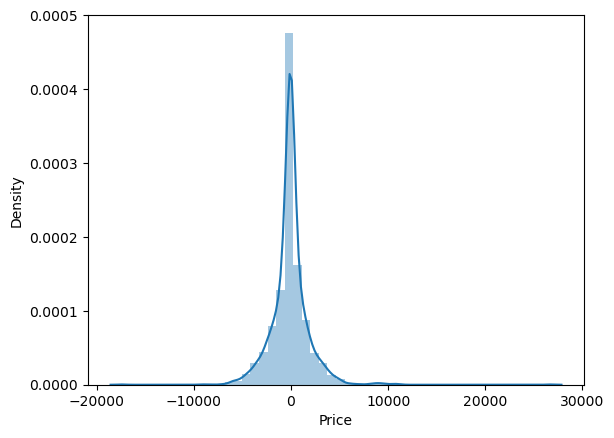

In [364]:
predict(RandomForestRegressor())

In [365]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.966591628243878
Predictions are: [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score: 0.6787853185118776
MAE: 1408.3378010732558
MSE: 6253278.825869421
RMSE: 2500.655679190844
MAPE: 15.580546580298249


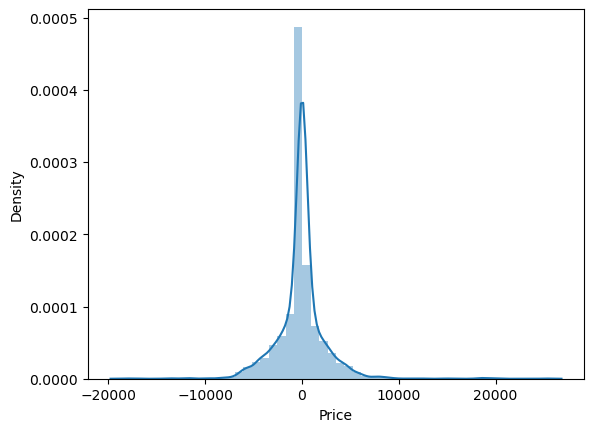

In [366]:
predict(DecisionTreeRegressor())

In [367]:
from sklearn.model_selection import RandomizedSearchCV

In [368]:
reg_rf = RandomForestRegressor()

In [369]:
np.linspace (start = 100, stop = 1200, num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [370]:
n_estimators = [int(x) for x in np.linspace (start = 100, stop = 1200, num = 6)]

max_features = ['auto' , 'sqrt']

max_depth = [int(x) for x in np.linspace (start = 5, stop = 30, num = 4)]

min_samples_split = [5,10,15,100]

In [371]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [372]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [373]:
rf_random = RandomizedSearchCV (estimator = reg_rf, param_distributions = random_grid, cv= 3, n_jobs = -1, verbose = 2)

In [374]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [375]:
rf_random.best_params_


{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [376]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=980)

In [377]:
rf_random.best_score_

np.float64(0.8064363764744967)